<a href="https://colab.research.google.com/github/PawasePranjal/PRODIGY_Task_1/blob/main/Prodigy_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
data=pd.read_csv("Housing.csv")
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
data.shape

(545, 13)

In [ ]:
X=data[["area","bedrooms","bathrooms"]]
Y=data["price"]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
y_pred=np.round(y_pred)
y_pred


array([6383168., 6230250., 3597885., 4289731., 3930446., 4883933.,
       5505773., 6068793., 3321512., 3495158., 8731338., 3561266.,
       3487336., 3633344., 3933900., 6661081., 2893133., 4635197.,
       4583377., 4275000., 4296640., 4920207., 3462808., 3875171.,
       5412497., 7425565., 3269692., 5021117., 7122557., 3238600.,
       5366584., 3640254., 6057517., 4847659., 4572199., 5573864.,
       4167436., 4021179., 3764622., 5307731., 5319221., 3456244.,
       6202613., 4013358., 4534100., 4235271., 6057517., 4525561.,
       4983206., 3238600., 6567080., 3238600., 4886476., 4116998.,
       4180094., 3567706., 5971150., 3391518., 5150855., 3514973.,
       4723104., 4722289., 4427005., 3915715., 4414099., 3861352.,
       5904599., 3598798., 5824515., 4531557., 4969297., 4759565.,
       5104120., 7612117., 3129433., 5816603., 3816442., 3865622.,
       4635197., 4393371., 6542083., 3971902., 5884784., 4866660.,
       3149691., 7466018., 3529704., 3754258., 6908277., 78400

In [ ]:
MSE=mean_squared_error(y_test,y_pred)
R2=r2_score(y_test,y_pred)


In [ ]:
print(f"Mean Square Error:{MSE}")
print(f"R2:{R2}")

Mean Square Error:2750040604569.376
R2:0.4559298871056473


In [ ]:
print("Coefficients:",model.coef_)
print("Intercept:",model.intercept_)

Coefficients: [3.45466570e+02 3.60197650e+05 1.42231966e+06]
Intercept: 59485.379208717495


In [ ]:
df=pd.DataFrame({"Actual Price":y_test,"Predicted Price":y_pred})
df

,Actual Price,Predicted Price
316,4060000,6383168.0
77,6650000,6230250.0
360,3710000,3597885.0
90,6440000,4289731.0
493,2800000,3930446.0
...,...,...
15,9100000,4995395.0
357,3773000,5316679.0
39,7910000,6417715.0
54,7350000,6057517.0


In [ ]:
df1=df.reset_index(drop=True)
print(df1)

     Actual Price  Predicted Price
0         4060000        6383168.0
1         6650000        6230250.0
2         3710000        3597885.0
3         6440000        4289731.0
4         2800000        3930446.0
..            ...              ...
104       9100000        4995395.0
105       3773000        5316679.0
106       7910000        6417715.0
107       7350000        6057517.0
108       5530000        6092064.0

[109 rows x 2 columns]


Line Plot: Actual Price and Predicted Price

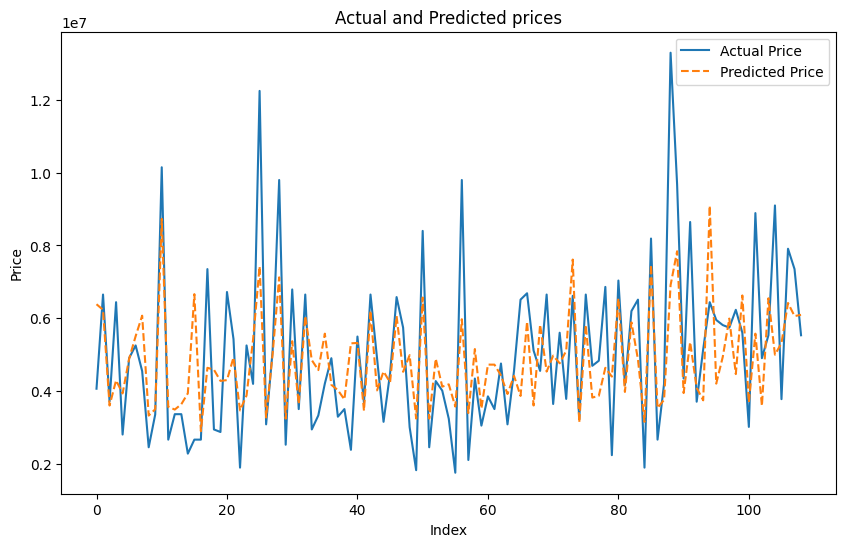

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df1["Actual Price"],label="Actual Price")
plt.plot(df1["Predicted Price"],label="Predicted Price",linestyle="dashed")
plt.xlabel("Index")
plt.ylabel("Price")
plt.title("Actual and Predicted prices")
plt.legend()
plt.show()